In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [2]:
sales_df=pd.read_csv(r'C:\Users\siddh\OneDrive\Desktop\DS\ADS_Python\PRoject2\AusApparalSales4thQrt2020.csv')

# 1. Data Summary

In [3]:
sales_df.columns

Index(['Date', 'Time', 'State', 'Group', 'Unit', 'Sales'], dtype='object')

In [4]:
sales_df.shape

(7560, 6)

In [5]:
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7560 entries, 0 to 7559
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    7560 non-null   object
 1   Time    7560 non-null   object
 2   State   7560 non-null   object
 3   Group   7560 non-null   object
 4   Unit    7560 non-null   int64 
 5   Sales   7560 non-null   int64 
dtypes: int64(2), object(4)
memory usage: 354.5+ KB


In [6]:
sales_df.head()

,Date,Time,State,Group,Unit,Sales
0,1-Oct-2020,Morning,WA,Kids,8,20000
1,1-Oct-2020,Morning,WA,Men,8,20000
2,1-Oct-2020,Morning,WA,Women,4,10000
3,1-Oct-2020,Morning,WA,Seniors,15,37500
4,1-Oct-2020,Afternoon,WA,Kids,3,7500


# 2. Data Wrangling

## 2.1 Checking Missing or Incorrect Data

In [8]:
sales_df.isnull().sum()

Date     0
Time     0
State    0
Group    0
Unit     0
Sales    0
dtype: int64

In [9]:
incorrect_sales=sales_df[sales_df['Sales']<0]

In [10]:
incorrect_sales

,Date,Time,State,Group,Unit,Sales


In [11]:
incorrect_units=sales_df[sales_df['Unit']<0]

In [12]:
incorrect_units

,Date,Time,State,Group,Unit,Sales


## 2.2 Normalization

In [13]:
scaler = MinMaxScaler()

In [14]:
sales_num=pd.DataFrame(sales_df, columns=['Unit','Sales'])

In [15]:
normalized_data = scaler.fit_transform(sales_num)

In [16]:
normalized_data

array([[0.0952381 , 0.0952381 ],
       [0.0952381 , 0.0952381 ],
       [0.03174603, 0.03174603],
       ...,
       [0.20634921, 0.20634921],
       [0.14285714, 0.14285714],
       [0.17460317, 0.17460317]])

In [17]:
new_df = pd.DataFrame(normalized_data, columns=['Normalized_Unit','Normalized_Sales'])

In [18]:
new_df

,Normalized_Unit,Normalized_Sales
0,0.095238,0.095238
1,0.095238,0.095238
2,0.031746,0.031746
3,0.206349,0.206349
4,0.015873,0.015873
...,...,...
7555,0.190476,0.190476
7556,0.206349,0.206349
7557,0.206349,0.206349
7558,0.142857,0.142857


In [19]:
final_df=pd.concat([sales_df,new_df], axis=1, join='inner')

In [20]:
final_df

,Date,Time,State,Group,Unit,Sales,Normalized_Unit,Normalized_Sales
0,1-Oct-2020,Morning,WA,Kids,8,20000,0.095238,0.095238
1,1-Oct-2020,Morning,WA,Men,8,20000,0.095238,0.095238
2,1-Oct-2020,Morning,WA,Women,4,10000,0.031746,0.031746
3,1-Oct-2020,Morning,WA,Seniors,15,37500,0.206349,0.206349
4,1-Oct-2020,Afternoon,WA,Kids,3,7500,0.015873,0.015873
...,...,...,...,...,...,...,...,...
7555,30-Dec-2020,Afternoon,TAS,Seniors,14,35000,0.190476,0.190476
7556,30-Dec-2020,Evening,TAS,Kids,15,37500,0.206349,0.206349
7557,30-Dec-2020,Evening,TAS,Men,15,37500,0.206349,0.206349
7558,30-Dec-2020,Evening,TAS,Women,11,27500,0.142857,0.142857


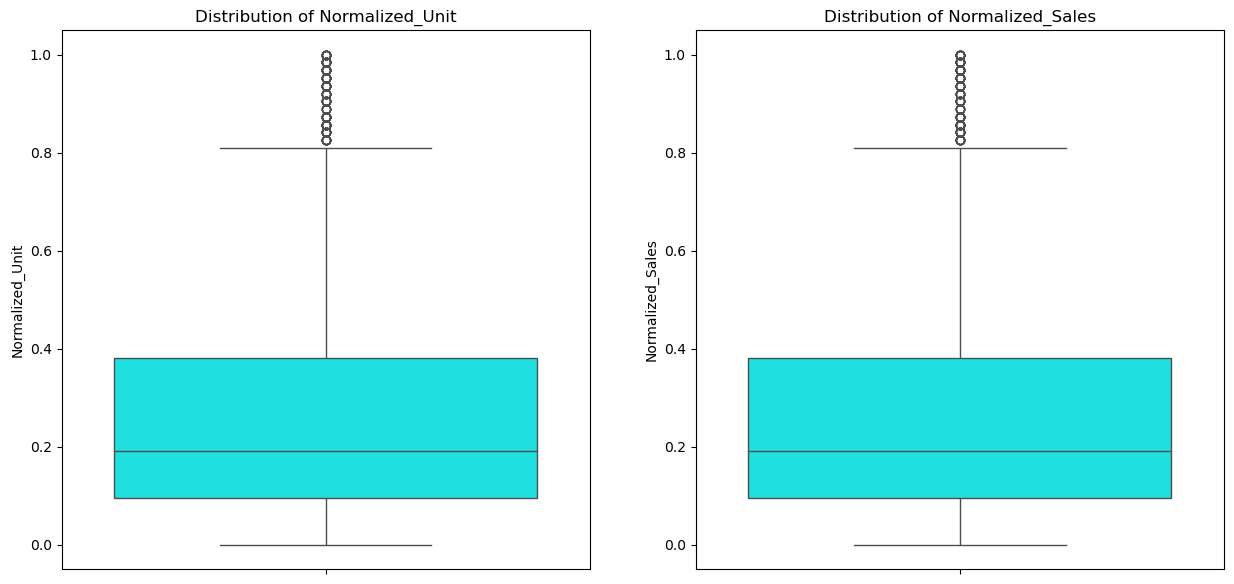

In [49]:
plt.figure(figsize=(15, 7))
plt.subplot(1, 2, 1)
sns.boxplot(y=final_df['Normalized_Unit'], color='cyan')
plt.title('Distribution of Normalized_Unit')

plt.subplot(1, 2, 2)
sns.boxplot(y=final_df['Normalized_Sales'], color='cyan')
plt.title('Distribution of Normalized_Sales')

plt.show()

### Outlier Detection & Removal

In [62]:
def outlier_treatment(datacolumn):
    sorted(datacolumn)
    Q1,Q3=np.percentile(datacolumn,[25,75])      
    IQR=Q3-Q1
    lower_range= Q1-(1.5*IQR)
    upper_range= Q3+(1.5*IQR)
    return lower_range, upper_range

In [79]:
lower,upper= outlier_treatment(final_df['Normalized_Sales'])

In [80]:
final_df.drop(final_df[(final_df['Normalized_Sales'] > upper) | (final_df['Normalized_Sales'] < lower)].index, inplace=True)

In [81]:
lower,upper= outlier_treatment(final_df['Normalized_Unit'])

In [82]:
final_df.drop(final_df[(final_df['Normalized_Unit'] > upper) | (final_df['Normalized_Unit'] < lower)].index, inplace=True)

In [83]:
final_df.shape

(7409, 8)

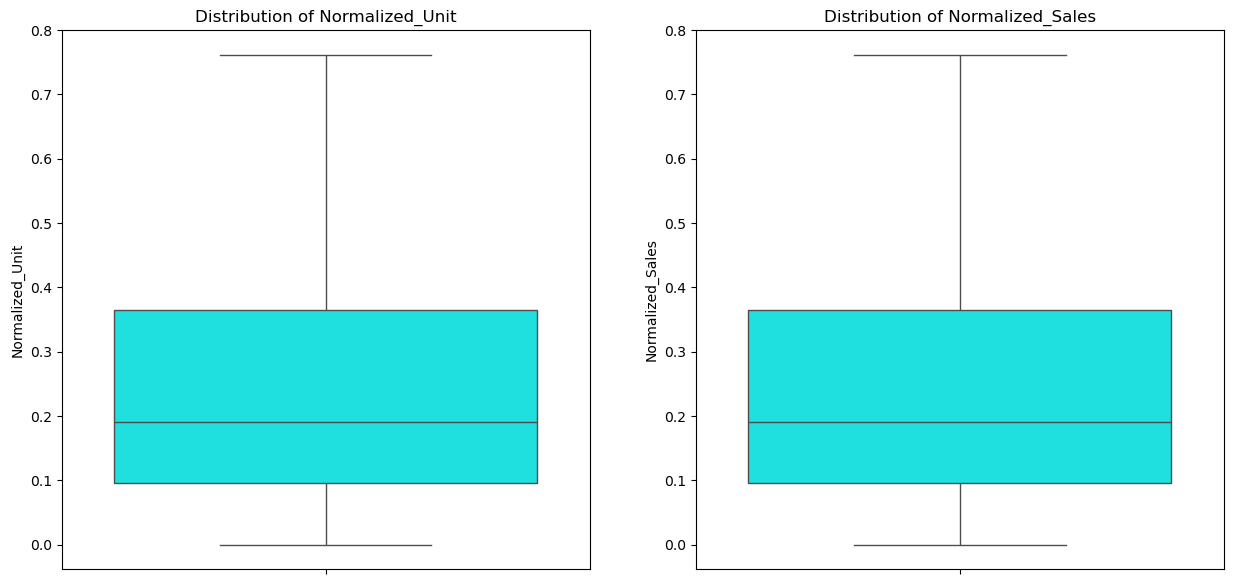

In [84]:
plt.figure(figsize=(15, 7))
plt.subplot(1, 2, 1)
sns.boxplot(y=final_df['Normalized_Unit'], color='cyan')
plt.title('Distribution of Normalized_Unit')

plt.subplot(1, 2, 2)
sns.boxplot(y=final_df['Normalized_Sales'], color='cyan')
plt.title('Distribution of Normalized_Sales')

plt.show()

In [85]:
# Note: The cleaned dataset is not considered for the further questions

# 3. Data Analysis

## 3.1 Descriptive Statistical Analysis On The Data In The Sales And Unit Columns

In [22]:
unit_sales_df=sales_df[['Unit','Sales']].describe()

In [23]:
unit_sales_df

,Unit,Sales
count,7560.000000,7560.000000
mean,18.005423,45013.558201
std,12.901403,32253.506944
min,2.000000,5000.000000
25%,8.000000,20000.000000
50%,14.000000,35000.000000
75%,26.000000,65000.000000
max,65.000000,162500.000000


## 3.2 Group With The Highest Sales And The Group With The Lowest Sales

In [24]:
sale_summary=sales_df.groupby(['Group']).agg({'Sales':'sum'})

In [25]:
sale_summary.sort_values(by='Sales', ascending=False)

,Sales
Group,
Men,85750000
Women,85442500
Kids,85072500
Seniors,84037500


In [26]:
highest_sales=sale_summary.idxmax()

In [27]:
highest_sales

Sales     Men
dtype: object

In [28]:
lowest_sales=sale_summary.idxmin()

In [29]:
lowest_sales

Sales     Seniors
dtype: object

<Axes: xlabel='Group', ylabel='Sales'>

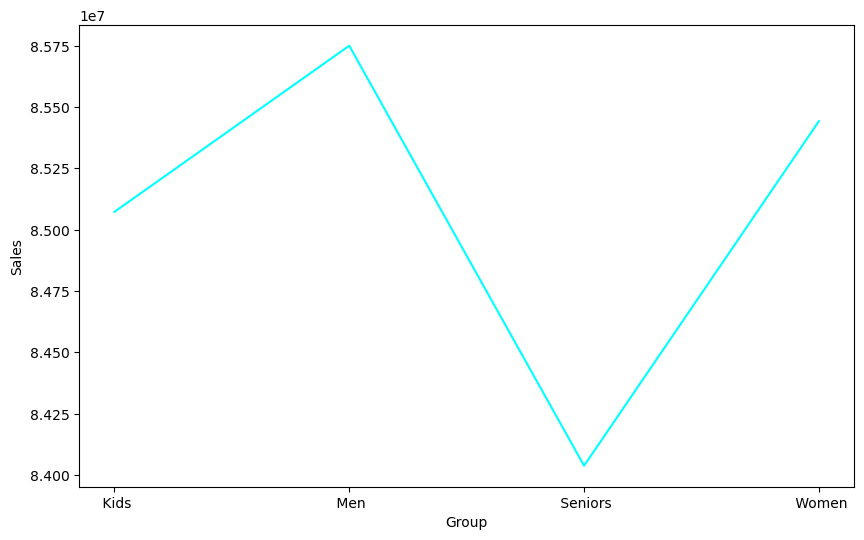

In [100]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=sale_summary, x='Group', y='Sales', color='cyan')

## 3.3 Weekly, Monthly, And Quarterly Reports

In [31]:
sales_df['Date']=pd.to_datetime(sales_df['Date'])

In [32]:
sales_df

,Date,Time,State,Group,Unit,Sales
0,2020-10-01,Morning,WA,Kids,8,20000
1,2020-10-01,Morning,WA,Men,8,20000
2,2020-10-01,Morning,WA,Women,4,10000
3,2020-10-01,Morning,WA,Seniors,15,37500
4,2020-10-01,Afternoon,WA,Kids,3,7500
...,...,...,...,...,...,...
7555,2020-12-30,Afternoon,TAS,Seniors,14,35000
7556,2020-12-30,Evening,TAS,Kids,15,37500
7557,2020-12-30,Evening,TAS,Men,15,37500
7558,2020-12-30,Evening,TAS,Women,11,27500


### 3.3.1 Weekly Report

In [33]:
weekly_report=sales_df.groupby(pd.Grouper(key='Date', freq='W')).agg({'Sales':'sum'})

In [34]:
print('\n Weekly Report \n',weekly_report)


 Weekly Report 
                Sales
Date                
2020-10-04  15045000
2020-10-11  27002500
2020-10-18  26640000
2020-10-25  26815000
2020-11-01  21807500
2020-11-08  20865000
2020-11-15  21172500
2020-11-22  21112500
2020-11-29  21477500
2020-12-06  29622500
2020-12-13  31525000
2020-12-20  31655000
2020-12-27  31770000
2021-01-03  13792500


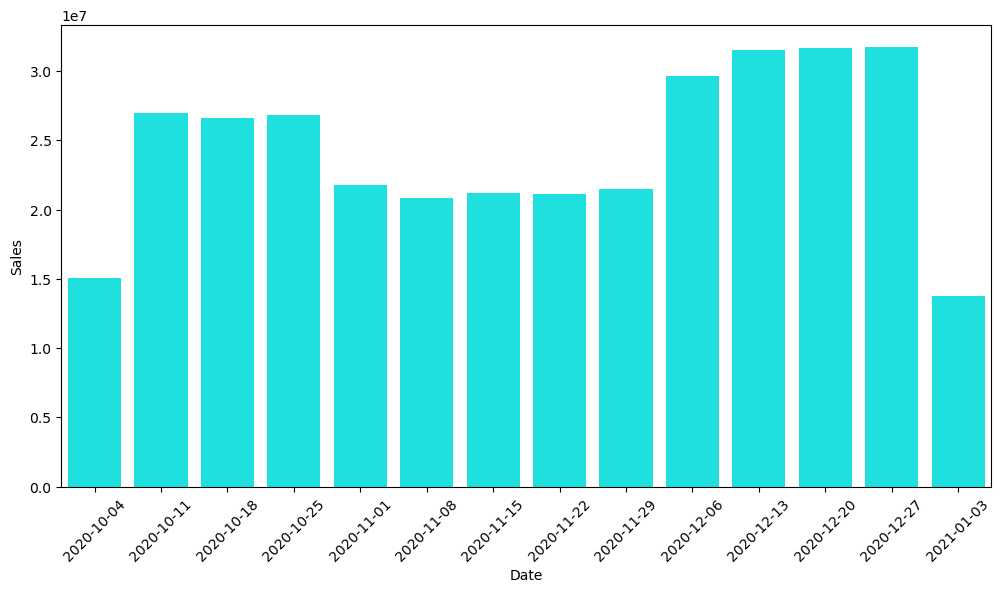

In [51]:
plt.figure(figsize=(12,6))
sns.barplot(data=weekly_report, x='Date', y='Sales', color='cyan')
plt.xticks(rotation=45)
plt.show()

### Monthly Report

In [36]:
monthly_report=sales_df.groupby(pd.Grouper(key='Date', freq='M')).agg({'Sales':'sum'})

In [37]:
print('\n Monthly Report \n',monthly_report)


 Monthly Report 
                 Sales
Date                 
2020-10-31  114290000
2020-11-30   90682500
2020-12-31  135330000


<Axes: xlabel='Date', ylabel='Sales'>

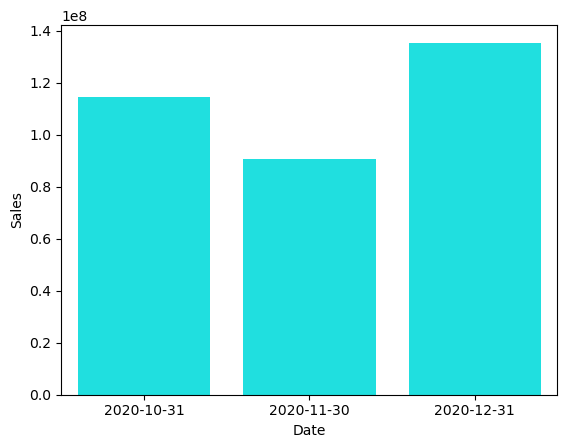

In [52]:
sns.barplot(data=monthly_report, x='Date', y='Sales', color='cyan')

### 3.3.3 Quarterly Report

In [39]:
quarterly_report = sales_df.groupby(pd.Grouper(key='Date', freq='Q')).agg({'Sales':'sum'})

In [40]:
print('\n Quarterly Report \n', quarterly_report)


 Quarterly Report 
                 Sales
Date                 
2020-12-31  340302500


# 4 Data Visualization

## 4.1 State-Wise Sales Analysis Across Groups

In [41]:
sales_df['State'].unique()

array([' WA', ' NT', ' SA', ' VIC', ' QLD', ' NSW', ' TAS'], dtype=object)

In [90]:
# groupby():
# It lets you organize rows into groups based on one or more column values,
# so you can perform operations on each group separately and then bring the results back together.
# This is especially useful for breaking data into meaningful segments (chunking) or summarizing data
# through aggregation before merging it back.


In [42]:
state_df = sales_df.groupby(['State','Group']).agg({'Sales':'sum'}).unstack()

In [43]:
state_df

Sales                              
Group      Kids       Men   Seniors     Women
State                                        
 NSW   18587500  19022500  18187500  19172500
 NT     5700000   5762500   5465000   5652500
 QLD    8510000   8392500   8190000   8325000
 SA    14515000  14655000  14717500  14970000
 TAS    5775000   5757500   5650000   5577500
 VIC   26360000  26407500  26315000  26482500
 WA     5625000   5752500   5512500   5262500

Text(0.5, 1.0, 'State-Wise Sales Analysis Across All Groups')

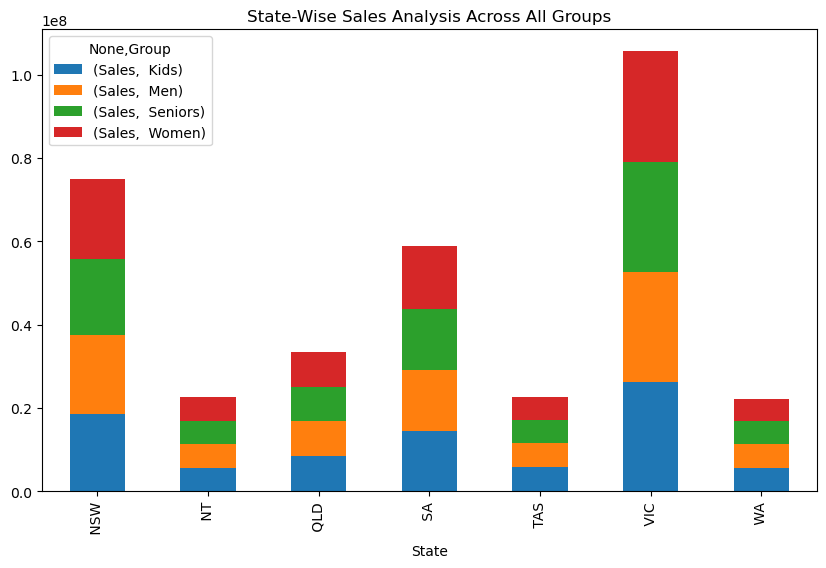

In [58]:
state_df.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('State-Wise Sales Analysis Across All Groups')

## 4.2 Group-Wise Sales Analysis Across States

In [45]:
group_df = sales_df.groupby(['Group','State']).agg({'Sales':'sum'}).unstack()

In [46]:
group_df

Sales                                                        
State          NSW       NT      QLD        SA      TAS       VIC       WA
Group                                                                     
 Kids     18587500  5700000  8510000  14515000  5775000  26360000  5625000
 Men      19022500  5762500  8392500  14655000  5757500  26407500  5752500
 Seniors  18187500  5465000  8190000  14717500  5650000  26315000  5512500
 Women    19172500  5652500  8325000  14970000  5577500  26482500  5262500

Text(0.5, 1.0, 'Group-Wise Sales Analysis Across All States')

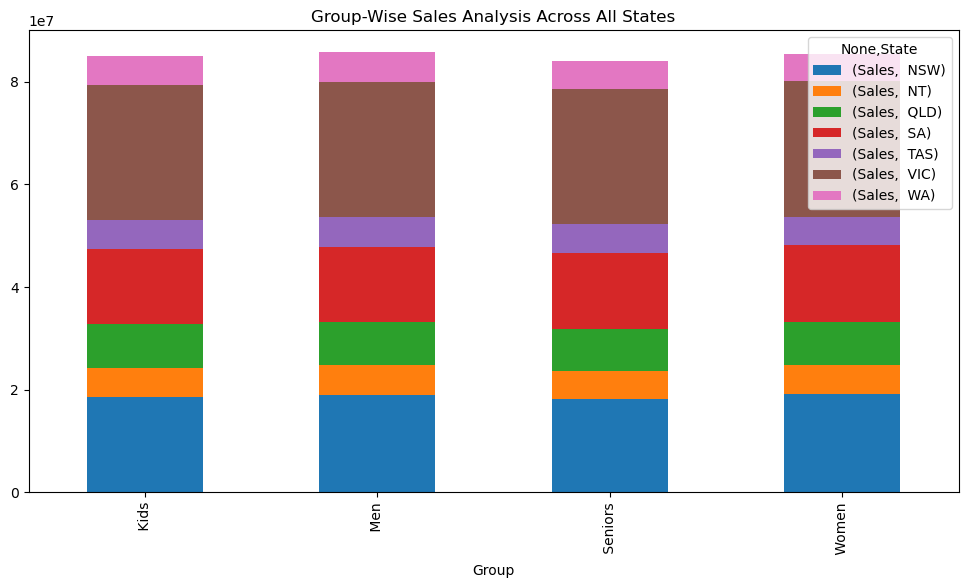

In [47]:
group_df.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Group-Wise Sales Analysis Across All States')

## 4.3 Time-Of-The-Day Analysis

Text(0.5, 0, 'Time of Day')

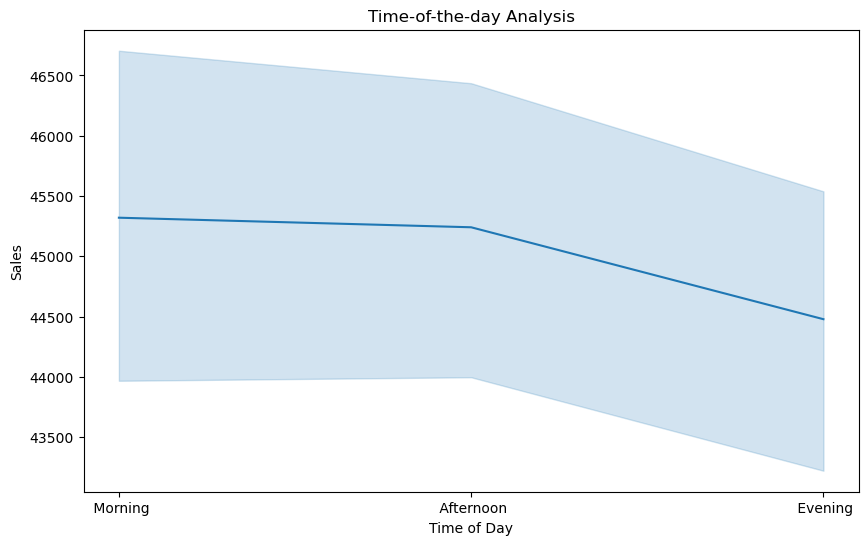

In [98]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='Time', y='Sales', data=sales_df)
plt.title('Time-of-the-day Analysis')
plt.xlabel('Time of Day')